Input num of control points:
5
Input coordinates:
1 1
2 1
3 4
4 5
5 10


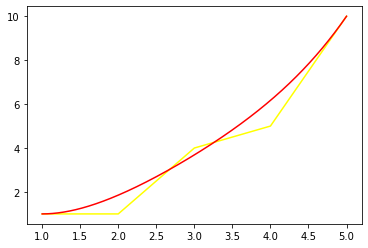

<Figure size 432x288 with 0 Axes>

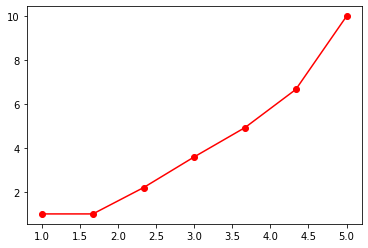

In [24]:
#上机3 实现自由曲线设计
#1. 任取4-8个控制点，画出控制多边形
#2. 求值，获得Bezier曲线，并标出 (t*=学号/10)处对应的点P (t*)
#3. 实现 (De Casteljan)分割算法，将Bezier曲线进行细分。标出左右子段的控制点
#4. 实现升阶算法，获得曲线升2阶后的新控制点

import matplotlib.pyplot as plt    
import numpy as np  
import math

plt.figure(1)

def fac(n):
    if n<=0:
        return 1
    else:
        return n*fac(n-1)

print('Input num of control points:')
a=int(input())
line=[[0]*2]*a
print('Input coordinates:')
for i in range(a):
    line[i]=input().split(" ")
    line[i]=[int(j) for j in line[i]]  
b=np.array(line)
x1=[]
y1=[]
for i in range(a):
    x1.append(b[i,0])
    y1.append(b[i,1])

plt.plot(x1,y1,color="yellow")

t=np.linspace(0,1,1000)
n=a-1
def X2(t):
    I=0
    for i in range(a):
        I=I+b[i,0]*(fac(n)/(fac(i)*fac(n-i)))*(t**i)*((1-t)**(n-i))
    return I       
def Y2(t):
    J=0
    for j in range(a):
        J=J+b[j,1]*(fac(n)/(fac(j)*fac(n-j)))*(t**j)*((1-t)**(n-j))
    return J
plt.figure(1)
plt.plot(X2(t),Y2(t),color="red")

t_=1.9
x3=x1[:]
y3=y1[:]
i=0
while i<a:
    j=a-1
    while j>i:
        x3[j]=(1-t_)*x3[j]+t_*x3[j-1]
        y3[j]=(1-t_)*y3[j]+t_*y3[j-1]
        j=j-1
    i=i+1
x4=x1[:]
y4=y1[:]
i=0
while i<a:
    j=a-1
    while j<a-i:
        x4[j]=(t_)*x4[j]+(1-t_)*x4[j-1]
        y4[j]=(t_)*y4[j]+(1-t_)*y4[j-1]
        j=j+1
    i=i+1
x5=x3+x4
y5=y3+y4
plt.figure(2)
#plt.plot(x5,y5,color="blue")


#习题4
x6=x1[:]
x6.append(0)
x6.append(0)
y6=y1[:]
y6.append(0)
y6.append(0)
x7=[0]*(a+2)
y7=[0]*(a+2)
for i in range(a+2):
    x7[i]=x6[i]*(fac(n)/(fac(i)*fac(n-i)))/(fac(n+2)/(fac(i)*fac(n+2-i)))+2*x6[i-1]*(fac(n)/(fac(i-1)*fac(n-i+1)))/(fac(n+2)/(fac(i)*fac(n+2-i)))+x6[i-2]*(fac(n)/(fac(i-2)*fac(n-i+2)))/(fac(n+2)/(fac(i)*fac(n+2-i)))
    y7[i]=y6[i]*(fac(n)/(fac(i)*fac(n-i)))/(fac(n+2)/(fac(i)*fac(n+2-i)))+2*y6[i-1]*(fac(n)/(fac(i-1)*fac(n-i+1)))/(fac(n+2)/(fac(i)*fac(n+2-i)))+y6[i-2]*(fac(n)/(fac(i-2)*fac(n-i+2)))/(fac(n+2)/(fac(i)*fac(n+2-i)))
plt.figure(3)
plt.plot(x7,y7,'ro-',label='Prob4')

plt.show()